#Algorithmic Trading Using Python
Using the MACD crossover strategy (Moving Average Convergence Divergence).

##MACD is a technical indicator that uses the differnce between exponential moving averages to determine momentum and direction of the market.

##The MACD line is calculated by taking the short term (12 periods) exponential moving average and subtracting the long term (26 periods) exponential moving average. And the signal line is usually a 9 period exponentially smooth average of the MACD line.

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
#load the data
#I am using a AAPL.csv file that I downloaded from yahoo finance website
#the data I have used is from Aug 17 2021 to Aug 17 2022
url = 'https://raw.githubusercontent.com/somadattareddy/Algorithmic-trading/main/AAPL.csv'
df = pd.read_csv(url)

#Setting the date to be the index
df=df.set_index(pd.DatetimeIndex(df['Date'].values))

#Showing the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2021-08-16,2021-08-16,148.539993,151.190002,146.470001,151.119995,150.277893,103296000
2021-08-17,2021-08-17,150.229996,151.679993,149.089996,150.190002,149.353104,92229700
2021-08-18,2021-08-18,149.800003,150.720001,146.149994,146.360001,145.544434,86326000
2021-08-19,2021-08-19,145.029999,148.000000,144.500000,146.699997,145.882553,86960300
2021-08-20,2021-08-20,147.440002,148.500000,146.779999,148.190002,147.364243,60549600
...,...,...,...,...,...,...,...
2022-08-10,2022-08-10,167.679993,169.339996,166.899994,169.240005,169.240005,70170500
2022-08-11,2022-08-11,170.059998,170.990005,168.190002,168.490005,168.490005,57149200
2022-08-12,2022-08-12,169.820007,172.169998,169.399994,172.100006,172.100006,67946400
2022-08-15,2022-08-15,171.520004,173.389999,171.350006,173.190002,173.190002,54091700


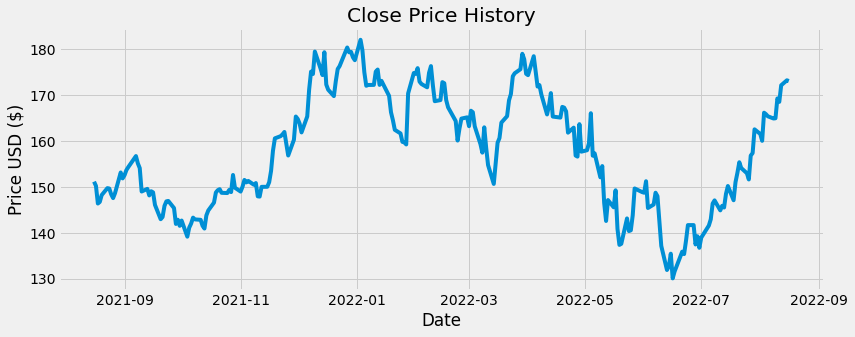

In [9]:
#Visually showing the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'],label='Close')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [10]:
#Calculating the MACD and signal line indicators
#Calculate the short term exponential moving average(EMA)
ShortEMA = df.Close.ewm(span=12,adjust=False).mean()
#Calculate the long term exponential moving average
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate Signal line
signal = MACD.ewm(span=9,adjust=False).mean()

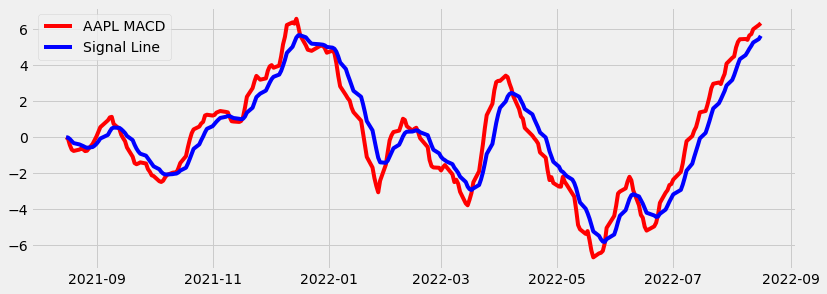

In [11]:
#Plot the chart
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,MACD,label = 'AAPL MACD',color='red')
plt.plot(df.index,signal,label='Signal Line', color='blue')
plt.legend(loc='upper left')
plt.show()

##When the MACD line crosses above the signal line, that indicates a good time to buy and when it is below the signal line, it is a good time to sell.

In [12]:
#create new columns for the data
df['MACD'] = MACD
df['Signal Line'] = signal
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2021-08-16,2021-08-16,148.539993,151.190002,146.470001,151.119995,150.277893,103296000,0.000000,0.000000
2021-08-17,2021-08-17,150.229996,151.679993,149.089996,150.190002,149.353104,92229700,-0.074187,-0.014837
2021-08-18,2021-08-18,149.800003,150.720001,146.149994,146.360001,145.544434,86326000,-0.436993,-0.099269
2021-08-19,2021-08-19,145.029999,148.000000,144.500000,146.699997,145.882553,86960300,-0.689141,-0.217243
2021-08-20,2021-08-20,147.440002,148.500000,146.779999,148.190002,147.364243,60549600,-0.759978,-0.325790
...,...,...,...,...,...,...,...,...,...
2022-08-10,2022-08-10,167.679993,169.339996,166.899994,169.240005,169.240005,70170500,5.656771,4.917574
2022-08-11,2022-08-11,170.059998,170.990005,168.190002,168.490005,168.490005,57149200,5.724925,5.079044
2022-08-12,2022-08-12,169.820007,172.169998,169.399994,172.100006,172.100006,67946400,6.001058,5.263447
2022-08-15,2022-08-15,171.520004,173.389999,171.350006,173.190002,173.190002,54091700,6.235965,5.457951


In [13]:
#Creating a function to signal when to buy and when to sell
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0,len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy,Sell)

In [14]:
#Create the buy sell column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [15]:
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2021-08-16,2021-08-16,148.539993,151.190002,146.470001,151.119995,150.277893,103296000,0.000000,0.000000,NaN,NaN
2021-08-17,2021-08-17,150.229996,151.679993,149.089996,150.190002,149.353104,92229700,-0.074187,-0.014837,NaN,150.190002
2021-08-18,2021-08-18,149.800003,150.720001,146.149994,146.360001,145.544434,86326000,-0.436993,-0.099269,NaN,NaN
2021-08-19,2021-08-19,145.029999,148.000000,144.500000,146.699997,145.882553,86960300,-0.689141,-0.217243,NaN,NaN
2021-08-20,2021-08-20,147.440002,148.500000,146.779999,148.190002,147.364243,60549600,-0.759978,-0.325790,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-10,2022-08-10,167.679993,169.339996,166.899994,169.240005,169.240005,70170500,5.656771,4.917574,NaN,NaN
2022-08-11,2022-08-11,170.059998,170.990005,168.190002,168.490005,168.490005,57149200,5.724925,5.079044,NaN,NaN
2022-08-12,2022-08-12,169.820007,172.169998,169.399994,172.100006,172.100006,67946400,6.001058,5.263447,NaN,NaN
2022-08-15,2022-08-15,171.520004,173.389999,171.350006,173.190002,173.190002,54091700,6.235965,5.457951,NaN,NaN


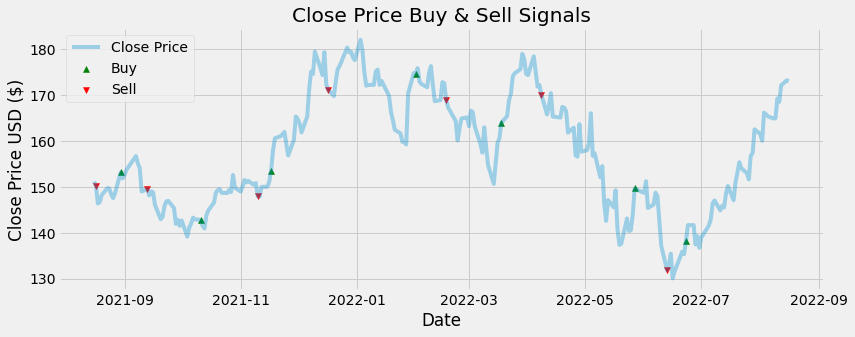

In [16]:
#Plotting the buy and sell signals
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green',label='Buy',marker='^',alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red',label='Sell',marker='v',alpha=1)
plt.plot(df['Close'],label='Close Price',alpha=0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()